In [536]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns

![image.png](attachment:image.png)

Ваша задача предсказать 'donr'

In [537]:
df_train = pd.read_csv('Real_Train_chr_data.csv')

In [538]:
X = df_train.drop('donr', axis=1)
y = df_train[['ID', 'donr']]



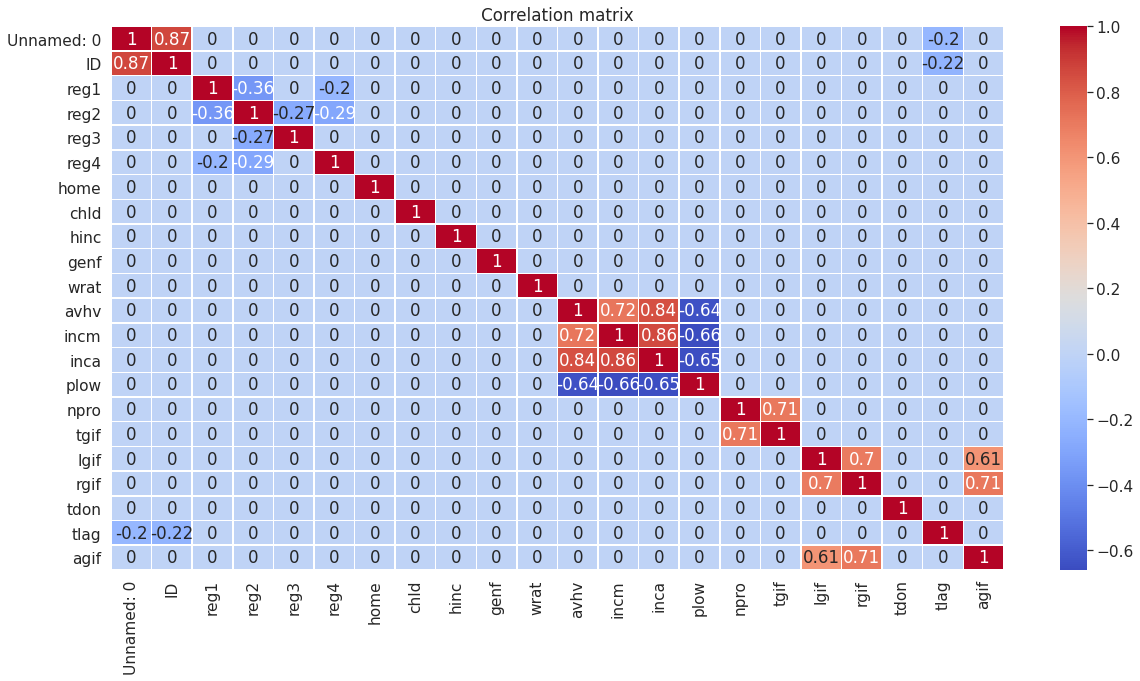

In [539]:
plt.figure(figsize = (20,10))

sns.set(font_scale=1.4)

corr_matrix = X.corr()

corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0  # Проверьте, что будет если убрать маленькие корреляции

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [540]:
X['agif_per_rgif'] = 1/X['agif']*X['rgif']
X['lgif_per_rgif'] = 1/X['lgif']*X['rgif']
X['avhv_per_plow'] = 1/X['avhv']*X['plow']
X['inca_per_incm'] = X['inca']/X['incm']
X['npro_per_rgif'] = X['npro']/X['rgif']
X['npro_per_lgif'] = X['rgif']/X['lgif']
X['chld_per_hinc'] = X['chld']*X['hinc']

In [541]:
regr = linear_model.LogisticRegression(random_state=0)

In [542]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [543]:
y_train['donr'].values

array([0., 0., 1., ..., 1., 1., 0.])

In [544]:
regr.fit(X_train, y_train['donr'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [545]:
y_pred = regr.predict(X_test)

In [546]:
y_test['donr'].values

array([0., 0., 0., ..., 1., 0., 1.])

## Подсчёт характеристик

In [547]:
confusion_matrix(y_test['donr'], y_pred)

array([[468, 171],
       [156, 466]])

In [548]:
f1_score(y_test['donr'], y_pred)

0.7402700555996822

## Сохранение результатов на тесте

In [549]:
#обучение на всех данных
fin_mod = linear_model.LogisticRegression(random_state=0)
fin_mod.fit(X, y['donr'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [550]:
df_test = pd.read_csv('Real_Test_chr_data.csv')

In [551]:
df_test['agif_per_rgif'] = 1/df_test['agif']*df_test['rgif']
df_test['lgif_per_rgif'] = 1/df_test['lgif']*df_test['rgif']
df_test['avhv_per_plow'] = 1/df_test['avhv']*df_test['plow']
df_test['inca_per_incm'] = df_test['inca']/df_test['incm']
df_test['npro_per_rgif'] = df_test['npro']/df_test['rgif']
df_test['npro_per_lgif'] = df_test['rgif']/df_test['lgif']
df_test['chld_per_hinc'] = df_test['chld']*df_test['hinc']

In [552]:
df_test.head()

,Unnamed: 0,ID,reg1,reg2,reg3,reg4,home,chld,hinc,genf,wrat,avhv,incm,inca,plow,npro,tgif,lgif,rgif,tdon,tlag,agif,agif_per_rgif,lgif_per_rgif,avhv_per_plow,inca_per_incm,npro_per_rgif,npro_per_lgif,chld_per_hinc
0,1782,3503,1,0,0,0,1,3,6,1,9,101,25,41,22,62,86,11,14,17,10,6.41,2.184087,1.272727,0.217822,1.640000,4.428571,1.272727,18
1,3917,7875,0,1,0,0,1,0,4,1,8,174,47,47,14,12,41,23,13,15,3,14.55,0.893471,0.565217,0.080460,1.000000,0.923077,0.565217,0
2,221,484,0,0,0,0,1,2,2,1,0,135,76,76,2,67,116,67,45,21,4,21.99,2.046385,0.671642,0.014815,1.000000,1.488889,0.671642,4
3,2135,4240,0,0,0,0,1,3,4,1,8,154,29,42,20,41,50,27,20,15,15,14.15,1.413428,0.740741,0.129870,1.448276,2.050000,0.740741,12
4,1841,7349,0,0,1,0,1,5,2,1,3,199,72,72,2,78,114,17,24,23,6,7.66,3.133159,1.411765,0.010050,1.000000,3.250000,1.411765,10


In [553]:
y_fin = fin_mod.predict(df_test)

In [554]:
y_fin_df = pd.DataFrame(y_fin, columns=['donr'])

In [555]:
y_fin_df

,donr
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
1796,1.0
1797,0.0
1798,1.0
1799,1.0


In [556]:
filename = '201210_Danchenkov_1.csv'
y_fin_df.to_csv(filename, index=None)